<a href="https://colab.research.google.com/github/divyam123-EECS-Physics/Airplane-Classifier/blob/main/Airplane_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
main_folder_path = '/content/drive/MyDrive/PlaneProjectt'

In [ ]:
df = pd.DataFrame(columns = ['File_Path', 'label'])


In [ ]:
labels = os.listdir(main_folder_path) 

In [ ]:
for label in labels:
  img_folder = main_folder_path + '/' + label
  if img_folder[-3:] != 'csv' :
    images = os.listdir(img_folder) 
    images_file_list = [img_folder + '/' + img for img in images if ((img != '.DS_Store') and (img != '.ipynb_checkpoints'))]
    df = df.append(pd.DataFrame({'File_Path':images_file_list, 'label':label}))

In [ ]:
df

,File_Path,label
0,/content/drive/MyDrive/PlaneProjectt/f16/f1672...,f16
1,/content/drive/MyDrive/PlaneProjectt/f16/f1674...,f16
2,/content/drive/MyDrive/PlaneProjectt/f16/f1677...,f16
3,/content/drive/MyDrive/PlaneProjectt/f16/f1671...,f16
4,/content/drive/MyDrive/PlaneProjectt/f16/f1675...,f16
...,...,...
191,/content/drive/MyDrive/PlaneProjectt/f15/f1524...,f15
192,/content/drive/MyDrive/PlaneProjectt/f15/f1525...,f15
193,/content/drive/MyDrive/PlaneProjectt/f15/f1525...,f15
194,/content/drive/MyDrive/PlaneProjectt/f15/f1524...,f15


In [ ]:

df.label.unique().tolist()

['f16', 'f18', 'f22', 'rafale', 'f35', 'mig29', 'p51', 'f15']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
a = plt.imread(df['File_Path'].iloc[0])
type(a)

numpy.ndarray

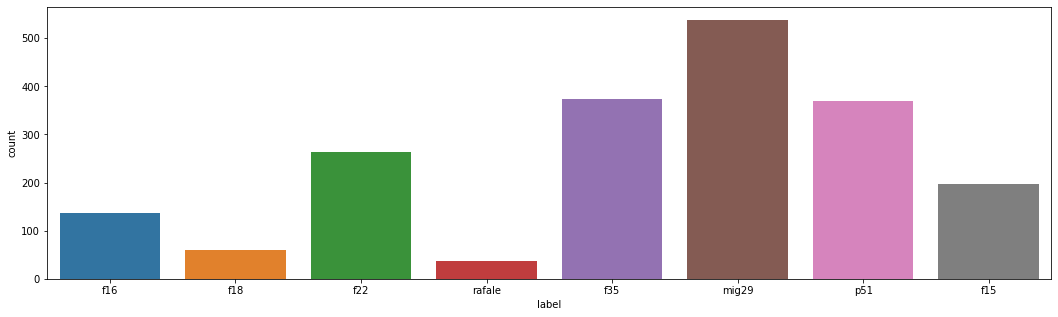

In [ ]:
plt.figure(figsize = (18,5))
sns.countplot(data = df, x = 'label')

In [ ]:
# we see that the classes have a uniform distribution

In [ ]:
import cv2

In [ ]:
def gray_cvt(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['File_Path'], df['label'], test_size=0.2, random_state=42)

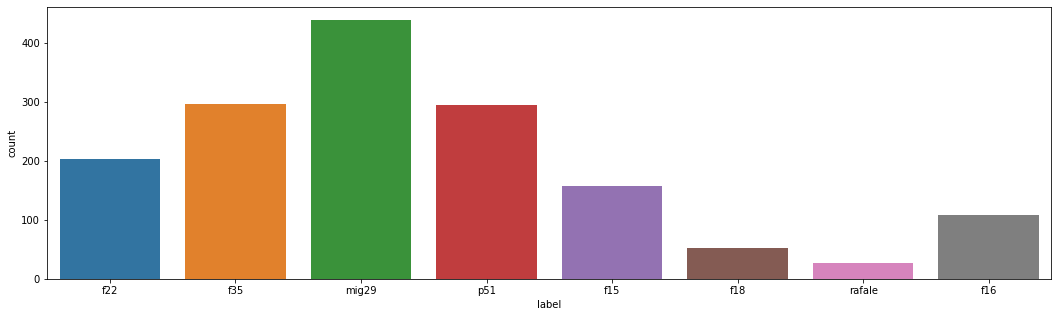

In [ ]:
plt.figure(figsize = (18,5))
 
sns.countplot(data = pd.DataFrame(y_train), x = 'label')

In [ ]:
X_train_flow_df = pd.concat([X_train, y_train], axis = 1)
X_test_flow_df = pd.concat([X_test, y_test], axis = 1)


In [ ]:
X_train_flow_df.columns

Index(['File_Path', 'label'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

In [ ]:
y_train_ohe = ohe.fit_transform(y_train.values.reshape(y_train.values.shape[0],1))

In [ ]:
ohe.categories_

[array(['f15', 'f16', 'f18', 'f22', 'f35', 'mig29', 'p51', 'rafale'],
       dtype=object)]

In [ ]:
y_test_ohe = ohe.transform(y_test.values.reshape(y_test.values.shape[0],1))

In [ ]:
# ListOfX = []
# ListOfY = []
# counter = 0 
# for i in X_train.values.tolist():
#   img = plt.imread(i)
#   x, y, _ = img.shape
#   counter += 1
#   print(counter)
#   ListOfX.append(x)
#   ListOfY.append(y)


In [ ]:
# sns.jointplot(x = ListOfX, y = ListOfY)

In [ ]:
# int(np.median(ListOfX)),np.median(ListOfY)

In [ ]:
input_shape = (224, 224, 3)#(int(np.median(ListOfX)),int(np.median(ListOfY)),3)


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

In [ ]:
 
 
# train_datagen = ImageDataGenerator( horizontal_flip=True,
#                                     vertical_flip=True,
#                                     rotation_range=10,
#                                     width_shift_range=0.1,
#                                     height_shift_range=0.1,
#                                     zoom_range=.1,
#                                     fill_mode='nearest',  
#                                     shear_range=0.1,
#                                     rescale=1/255,
#                                     brightness_range=[0.5, 1.5])
 
 
 
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                               validation_split=0.2,
                               preprocessing_function = None#gray_cvt
                              )

In [ ]:
Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False).summary()


Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
train_generator = image_gen.flow_from_dataframe(
                              dataframe=X_train_flow_df,
                              x_col="File_Path",
                              y_col="label",
                              subset="training",
                              batch_size=32,
                              seed=42,
                              shuffle=True,
                              class_mode="categorical",
                              target_size=input_shape[:2],
                              color_mode = 'rgb')



Found 1263 validated image filenames belonging to 8 classes.


In [ ]:
valid_generator=image_gen.flow_from_dataframe(
                              dataframe=X_train_flow_df,
                              x_col="File_Path",
                              y_col="label",
                              subset="validation",
                              batch_size=32,
                              seed=42,
                              shuffle=True,
                              class_mode="categorical",
                              target_size=input_shape[:2],
                              color_mode = 'rgb')


Found 315 validated image filenames belonging to 8 classes.


In [ ]:
xception = Xception(input_shape=input_shape, weights='imagenet', include_top=False)

# train = False
# # for i,layer in enumerate(xception.layers):
# #     layer.trainable = train
# #     if layer.name == 'add_2':
# #       train = True
# #     if layer.name == 'block5_sepconv3_bn':
# #       drop = i

# for layer in xception.layers[-16:]:
#   layer.trainable = True
    
for layer in xception.layers:
  layer.trainable = True

# # for layer in xception.layers[-8:]:
# #   layer.trainable = True



In [ ]:
x = Dropout(0.8)(xception.output)
x = Flatten()(xception.output)
x = Dropout(0.4)(x)
prediction = Dense(8, activation='softmax')(x)


In [ ]:
model = Model(inputs=xception.input, outputs=prediction)


In [ ]:
# cnn1 = Sequential([
#     Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
#     MaxPool2D(pool_size=(2, 2),strides=2),
#     Conv2D(16, kernel_size=(5, 5), activation='relu'),
#     MaxPool2D(pool_size=(2, 2),strides=2),
#     Flatten(),
#     Dense(120, activation='relu'),
#     Dense(84, activation='relu'),
#     Dense(9, activation='softmax')
# ])

cnn1 = Sequential([
    Conv2D(16, kernel_size=(11, 11), activation='relu',input_shape=input_shape),
    MaxPool2D(pool_size=(2, 2),strides=2),
    Conv2D(16, kernel_size=(11, 11), activation='relu',input_shape=input_shape),
    MaxPool2D(pool_size=(2, 2),strides=2),
    Conv2D(32, kernel_size=(9, 9), activation='relu'),
    MaxPool2D(pool_size=(2, 2),strides=2),
    Conv2D(64, kernel_size=(7, 7), activation='relu'),
    MaxPool2D(pool_size=(2, 2),strides=2),
    Conv2D(128, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(8, activation='softmax')
])

In [ ]:
metrics = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer= 'Adam',#keras.optimizers.Adam(learning_rate = 0.001),
  metrics= metrics
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stop = EarlyStopping(monitor = 'val_auc' ,mode = 'max',patience=2)

In [ ]:
results = model.fit_generator(train_generator,epochs=25,
                              validation_data = valid_generator, callbacks=[early_stop])


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
40/40 [==============================] - 884s 22s/step - loss: 2.1482 - tp: 5.0000 - fp: 33.0000 - tn: 8808.0000 - fn: 1258.0000 - accuracy: 0.8722 - precision: 0.1316 - recall: 0.0040 - auc: 0.6263 - prc: 0.1808 - val_loss: 3.4364 - val_tp: 71.0000 - val_fp: 189.0000 - val_tn: 2016.0000 - val_fn: 244.0000 - val_accuracy: 0.8282 - val_precision: 0.2731 - val_recall: 0.2254 - val_auc: 0.6620 - val_prc: 0.2042
Epoch 2/25
40/40 [==============================] - 870s 22s/step - loss: 1.8487 - tp: 25.0000 - fp: 43.0000 - tn: 8798.0000 - fn: 1238.0000 - accuracy: 0.8732 - precision: 0.3676 - recall: 0.0198 - auc: 0.7228 - prc: 0.2573 - val_loss: 2.4048 - val_tp: 57.0000 - val_fp: 116.0000 - val_tn: 2089.0000 - val_fn: 258.0000 - val_accuracy: 0.8516 - val_precision: 0.3295 - val_recall: 0.1810 - val_auc: 0.7240 - val_prc: 0.2415
Epoch 3/25
40/40 [==============================] - 875s 22s/step - loss: 1.6359 - tp: 194.0000 - fp: 102.0000 - tn: 8739.0000 - fn: 1069.0000 - accuracy

In [ ]:
losses = pd.DataFrame(results.history)

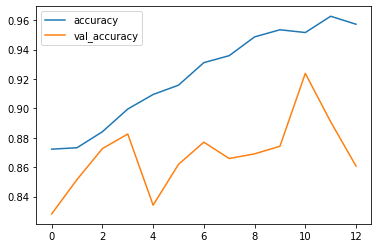

In [ ]:
losses[['accuracy','val_accuracy']].plot()


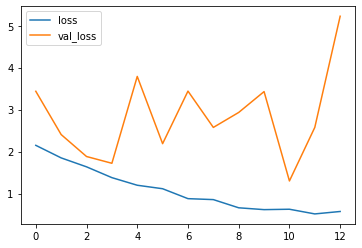

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255., preprocessing_function = None)#gray_cvt)
 
test_generator=test_datagen.flow_from_dataframe(
                                            dataframe=X_test_flow_df,
                                            directory="",
                                            x_col="File_Path",
                                            y_col='label',
                                            batch_size=1,
                                            seed=42,
                                            shuffle=False,
                                            class_mode='categorical',
                                            target_size=input_shape[:2],
                                            color_mode = 'rgb')

Found 395 validated image filenames belonging to 8 classes.


In [ ]:
test_generator.reset()
pred=model.predict(test_generator,verbose=1)

395/395 [==============================] - 111s 279ms/step


In [ ]:
model.evaluate(test_generator)

395/395 [==============================] - 65s 163ms/step - loss: 5.0566 - tp: 164.0000 - fp: 206.0000 - tn: 2559.0000 - fn: 231.0000 - accuracy: 0.8617 - precision: 0.4432 - recall: 0.4152 - auc: 0.7215 - prc: 0.3846


[5.056595325469971,
 164.0,
 206.0,
 2559.0,
 231.0,
 0.8617088794708252,
 0.44324323534965515,
 0.41518986225128174,
 0.721535861492157,
 0.38459673523902893]

In [ ]:
predictions = pred > 0.5

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
len(predictions), len(X_test_flow_df)

(395, 395)

In [ ]:
b = predictions.argmax(axis=1)

In [ ]:
predictions.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
b

array([3, 3, 0, 3, 5, 3, 1, 0, 1, 5, 3, 0, 0, 4, 3, 3, 3, 0, 3, 4, 0, 3,
       3, 3, 1, 3, 4, 3, 3, 4, 6, 3, 3, 3, 3, 6, 0, 0, 1, 0, 3, 0, 5, 3,
       3, 3, 3, 0, 0, 3, 6, 0, 6, 3, 3, 4, 3, 3, 3, 0, 3, 6, 0, 4, 0, 3,
       4, 0, 1, 3, 0, 0, 3, 3, 0, 3, 3, 3, 4, 0, 0, 3, 0, 3, 3, 0, 3, 6,
       4, 3, 4, 3, 3, 3, 3, 3, 1, 4, 3, 3, 0, 3, 6, 1, 0, 0, 3, 0, 3, 0,
       3, 3, 0, 3, 6, 4, 3, 3, 6, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 5,
       6, 3, 4, 3, 3, 3, 3, 4, 0, 3, 3, 3, 3, 0, 0, 3, 4, 3, 3, 4, 0, 3,
       4, 3, 0, 3, 5, 3, 0, 3, 3, 0, 0, 6, 6, 3, 0, 3, 3, 0, 0, 3, 3, 3,
       3, 1, 0, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 5, 1, 3, 3, 3, 0,
       3, 0, 3, 3, 5, 2, 0, 4, 3, 3, 3, 5, 3, 0, 4, 1, 4, 0, 3, 3, 6, 6,
       0, 3, 0, 5, 3, 3, 3, 0, 6, 0, 3, 3, 0, 3, 1, 3, 0, 0, 3, 3, 0, 3,
       1, 0, 0, 3, 3, 3, 5, 0, 0, 1, 0, 0, 3, 4, 3, 3, 3, 0, 0, 3, 0, 0,
       3, 3, 1, 0, 0, 1, 0, 2, 4, 3, 5, 4, 3, 1, 3, 0, 3, 0, 3, 3, 3, 0,
       3, 1, 4, 3, 3, 3, 6, 3, 0, 3, 0, 6, 2, 3, 1,

In [ ]:
test_generator.class_indices

{'f15': 0,
 'f16': 1,
 'f18': 2,
 'f22': 3,
 'f35': 4,
 'mig29': 5,
 'p51': 6,
 'rafale': 7}

In [ ]:
y_test.unique()

array(['f35', 'f22', 'p51', 'mig29', 'f16', 'f15', 'f18', 'rafale'],
      dtype=object)

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

In [ ]:
labels

{0: 'f15',
 1: 'f16',
 2: 'f18',
 3: 'f22',
 4: 'f35',
 5: 'mig29',
 6: 'p51',
 7: 'rafale'}

In [ ]:
predictions_class_list = [labels[val] for val in b]

In [ ]:
predictions_class_df = pd.Series(predictions_class_list)

In [ ]:
y_test.shape, predictions_class_df.shape

((395,), (395,))

In [ ]:
classification_report(predictions_class_df, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         f15       0.47      0.18      0.26       100\n         f16       0.62      0.75      0.68        24\n         f18       0.00      0.00      0.00         5\n         f22       0.93      0.30      0.45       189\n         f35       0.47      0.88      0.61        41\n       mig29       0.14      1.00      0.25        14\n         p51       0.29      1.00      0.45        22\n      rafale       0.00      0.00      0.00         0\n\n    accuracy                           0.42       395\n   macro avg       0.37      0.51      0.34       395\nweighted avg       0.67      0.42      0.42       395\n'

In [ ]:
confusion_matrix(predictions_class_df, y_test)

array([[18,  9,  5,  1, 13, 27, 25,  2],
       [ 0, 18,  0,  0,  2,  0,  2,  2],
       [ 0,  0,  0,  1,  1,  3,  0,  0],
       [20,  2,  3, 56, 25, 55, 23,  5],
       [ 0,  0,  0,  2, 36,  0,  3,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

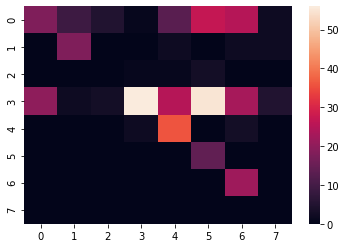

In [ ]:
sns.heatmap(confusion_matrix(predictions_class_df, y_test), xticklabels = labels, yticklabels = labels)